##레인보우 옵션(Rainbow Option)
레인보우 옵션(Rainbow Option)은 여러 기초 자산의 가격에 의존하는 옵션으로, 다양한 기초 자산의 움직임을 동시에 고려할 수 있습니다. 레인보우 옵션은 두 가지 이상의 기초 자산을 결합하여 페이오프를 계산합니다. 예를 들어, 두 주식 중에서 더 좋은 성과를 보이는 주식의 가격을 기준으로 페이오프가 결정될 수 있습니다.

Rainbow Call Option Price: 19.26


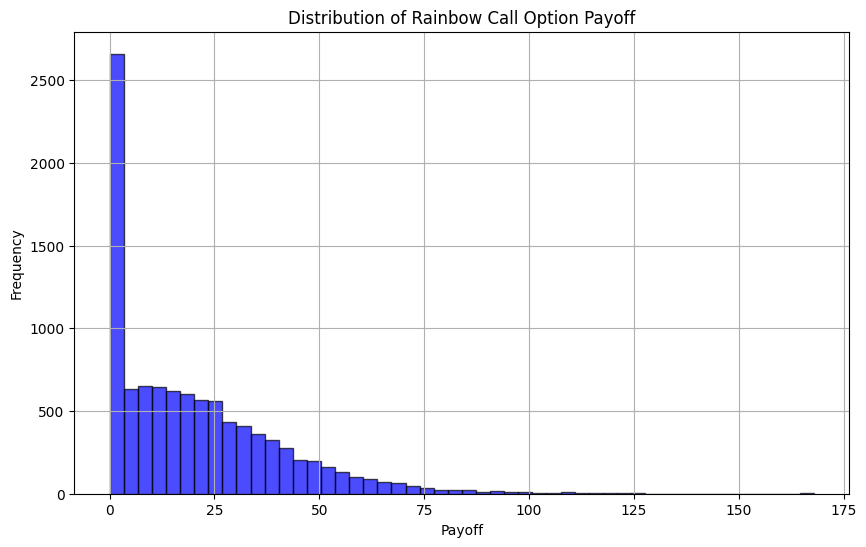

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_stock_paths(S0, r, sigma, T, M, I):
    """
    주식 가격 경로 시뮬레이션 함수

    Parameters:
    S0: 초기 주식 가격 (배열)
    r: 무위험 이자율
    sigma: 변동성 (배열)
    T: 만기 시간 (단위: 년)
    M: 기간 수 (단위: 일)
    I: 시뮬레이션 수

    Returns:
    주식 가격 경로 배열 (I x M x len(S0))
    """
    dt = T / M
    paths = np.zeros((I, M + 1, len(S0)))
    paths[:, 0, :] = S0
    for t in range(1, M + 1):
        z = np.random.standard_normal((I, len(S0)))
        for i in range(len(S0)):
            paths[:, t, i] = paths[:, t - 1, i] * np.exp((r - 0.5 * sigma[i] ** 2) * dt + sigma[i] * np.sqrt(dt) * z[:, i])
    return paths

def rainbow_option_payoff(paths, K, option_type="call"):
    """
    레인보우 옵션의 페이오프 계산 함수

    Parameters:
    paths: 주식 가격 경로 배열 (I x M x len(S0))
    K: 행사가격
    option_type: "call" 또는 "put"

    Returns:
    레인보우 옵션의 페이오프 배열
    """
    if option_type == "call":
        payoff = np.maximum(np.max(paths[:, -1, :], axis=1) - K, 0)
    elif option_type == "put":
        payoff = np.maximum(K - np.min(paths[:, -1, :], axis=1), 0)
    else:
        raise ValueError("option_type must be 'call' or 'put'")
    return payoff

# 예제 파라미터 설정
S0 = [100, 100]  # 두 주식의 초기 가격
r = 0.05  # 무위험 이자율
sigma = [0.2, 0.25]  # 두 주식의 변동성
T = 1  # 만기 시간 (1년)
M = 252  # 기간 수 (일 단위)
I = 10000  # 시뮬레이션 수
K = 100  # 행사가격

# 주식 가격 경로 시뮬레이션
paths = simulate_stock_paths(S0, r, sigma, T, M, I)

# 레인보우 옵션 페이오프 계산
rainbow_call_payoffs = rainbow_option_payoff(paths, K, option_type="call")

# 레인보우 옵션 가격 계산 (할인된 페이오프 평균)
rainbow_call_price = np.exp(-r * T) * np.mean(rainbow_call_payoffs)
print(f"Rainbow Call Option Price: {rainbow_call_price:.2f}")

# 시각화
plt.figure(figsize=(10, 6))
plt.hist(rainbow_call_payoffs, bins=50, color='blue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Rainbow Call Option Payoff')
plt.xlabel('Payoff')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


아래는 5개의 주식을 선택하여 레인보우 옵션의 페이오프를 계산하고 시각화하는 파이썬 코드 예제입니다. 여기서는 애플(AAPL), 마이크로소프트(MSFT), 아마존(AMZN), 구글(GOOG), 테슬라(TSLA) 주식을 사용하겠습니다.

[*********************100%%**********************]  5 of 5 completed


Rainbow Call Option Price: 101.33


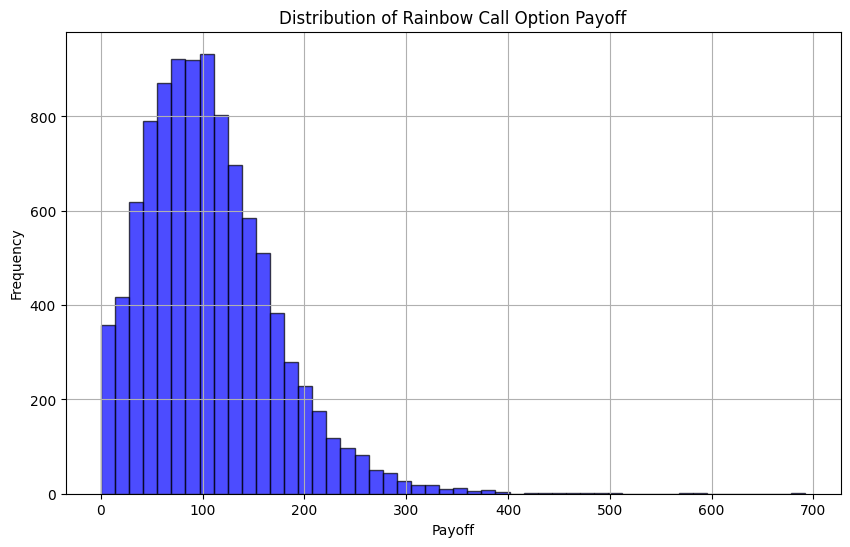

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

def simulate_stock_paths(S0, r, sigma, T, M, I):
    """
    주식 가격 경로 시뮬레이션 함수

    Parameters:
    S0: 초기 주식 가격 (배열)
    r: 무위험 이자율
    sigma: 변동성 (배열)
    T: 만기 시간 (단위: 년)
    M: 기간 수 (단위: 일)
    I: 시뮬레이션 수

    Returns:
    주식 가격 경로 배열 (I x M x len(S0))
    """
    dt = T / M
    paths = np.zeros((I, M + 1, len(S0)))
    paths[:, 0, :] = S0
    for t in range(1, M + 1):
        z = np.random.standard_normal((I, len(S0)))
        for i in range(len(S0)):
            paths[:, t, i] = paths[:, t - 1, i] * np.exp((r - 0.5 * sigma[i] ** 2) * dt + sigma[i] * np.sqrt(dt) * z[:, i])
    return paths

def rainbow_option_payoff(paths, K, option_type="call"):
    """
    레인보우 옵션의 페이오프 계산 함수

    Parameters:
    paths: 주식 가격 경로 배열 (I x M x len(S0))
    K: 행사가격
    option_type: "call" 또는 "put"

    Returns:
    레인보우 옵션의 페이오프 배열
    """
    if option_type == "call":
        payoff = np.maximum(np.max(paths[:, -1, :], axis=1) - K, 0)
    elif option_type == "put":
        payoff = np.maximum(K - np.min(paths[:, -1, :], axis=1), 0)
    else:
        raise ValueError("option_type must be 'call' or 'put'")
    return payoff

# yfinance를 사용하여 데이터 다운로드
tickers = ['AAPL', 'MSFT', 'AMZN', 'GOOG', 'TSLA']
data = yf.download(tickers, start="2023-01-01", end="2023-12-31")['Close']
closing_prices = data.values

# 다섯 주식의 초기 가격, 변동성 계산
S0 = closing_prices[0]
sigma = np.std(np.diff(np.log(closing_prices), axis=0), axis=0) * np.sqrt(252)

# 레인보우 옵션 파라미터 설정
r = 0.05  # 무위험 이자율
T = 1  # 만기 시간 (1년)
M = 252  # 기간 수 (일 단위)
I = 10000  # 시뮬레이션 수
K = 150  # 행사가격

# 주식 가격 경로 시뮬레이션
paths = simulate_stock_paths(S0, r, sigma, T, M, I)

# 레인보우 옵션 페이오프 계산
rainbow_call_payoffs = rainbow_option_payoff(paths, K, option_type="call")

# 레인보우 옵션 가격 계산 (할인된 페이오프 평균)
rainbow_call_price = np.exp(-r * T) * np.mean(rainbow_call_payoffs)
print(f"Rainbow Call Option Price: {rainbow_call_price:.2f}")

# 시각화
plt.figure(figsize=(10, 6))
plt.hist(rainbow_call_payoffs, bins=50, color='blue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Rainbow Call Option Payoff')
plt.xlabel('Payoff')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
